# Feature Engineering
This notebook will be used to implement a neural network using Keras. The goal is to implement a neural network to predict the outcome of an NCAA basketball game. First we will perform feature engineering to ensure the data is formatted such that it will fit in the neural network. First we will drop all non required fields. Then we use a label encoder to encode the winner attribute so that it is a 0 or 1. This is a requirement for the output node in the neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_NCAA = pd.read_csv('../data/data-full-good.csv')
df_NCAA.head()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
0,26.3,5,2.9,1,131.0,52.4,11,0.413,52,0.365,...,21,0.900,9,"Moody Coliseum , Abilene, Texas",Schreiner\n\t\t\t,Schreiner\n\t\t\t,71.0,Home,ABILENE-CHRISTIAN,Abilene Christian
1,26.7,4,6.1,3,120.5,45.0,18,0.318,55,0.273,...,27,0.846,11,"Moody Coliseum , Abilene, Texas",McMurry\n\t\t\t,McMurry\n\t\t\t,73.2,Home,ABILENE-CHRISTIAN,Abilene Christian
2,27.3,6,5.9,2,120.3,87.5,21,0.522,45,0.489,...,20,0.889,8,"Moody Coliseum , Abilene, Texas",CAMPBELL,Campbell,69.3,Home,ABILENE-CHRISTIAN,Abilene Christian
3,27.3,6,10.3,3,110.8,71.0,22,0.439,57,0.386,...,16,0.800,24,"Moody Coliseum , Abilene, Texas",STEPHEN-F-AUSTIN,Stephen F. Austin,65.1,Home,ABILENE-CHRISTIAN,Abilene Christian
4,27.8,5,0.0,0,142.7,50.0,13,0.418,49,0.367,...,30,1.000,1,"Moody Coliseum , Abilene, Texas",Arlington Baptist\n\t\t\t,Arlington Baptist\n\t\t\t,74.8,Home,ABILENE-CHRISTIAN,Abilene Christian


In [2]:
df_NCAA = df_NCAA.drop(['winning_name', 'winning_abbr', 'losing_name', 'losing_abbr', 'location'], axis=1)

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df_NCAA['winner'])
df_NCAA['winner'] = le.transform(df_NCAA['winner'])
df_NCAA.head()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,pace,winner
0,26.3,5,2.9,1,131.0,52.4,11,0.413,52,0.365,...,0.700,20.6,17,34,0.618,21,0.900,9,71.0,1
1,26.7,4,6.1,3,120.5,45.0,18,0.318,55,0.273,...,0.539,14.7,14,49,0.551,27,0.846,11,73.2,1
2,27.3,6,5.9,2,120.3,87.5,21,0.522,45,0.489,...,0.688,14.4,10,34,0.588,20,0.889,8,69.3,1
3,27.3,6,10.3,3,110.8,71.0,22,0.439,57,0.386,...,0.546,10.9,8,29,0.552,16,0.800,24,65.1,1
4,27.8,5,0.0,0,142.7,50.0,13,0.418,49,0.367,...,0.704,12.8,11,43,0.698,30,1.000,1,74.8,1


The features we will use to train the neural network has been taken from the feature selection notebook. Please refer to that notebook for a further breakdown of how the following features have been selected

In [5]:
from sklearn import preprocessing
X = df_NCAA[['away_defensive_rating', 'away_field_goals' ,'away_free_throws', 'away_offensive_rating', 'away_points', 'away_three_point_field_goals', 'away_wins', 'home_defensive_rating', 'home_field_goals', 'home_free_throws', 'home_offensive_rating', 'home_points', 'home_three_point_field_goals', 'home_wins']]
Y = df_NCAA[['winner']]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


# Building a Neural Network using Keras
Now that the data has been set up for the neural network, we will implement the neural network using Keras.

For this neural network we define 14 nodes in the input layer (one node for each feature), 1 for the output layer (either 0 or 1 depending on whether a win or loss is predicted), and 12 neuron in the hidden layer. (From my reserach online, it is commonly believed that the number of hidden layers should fall somewhere between the input and output lairs. Based on that information, some trial and error was performed and it was discovered that 12 nodes worked well.

I use the rectifier activation function (relu) on the first two layers and the sigmoid function in the output layer. The machine learning community used to prefer the sigmoid and tanh activation function for all layers, but through my research I discovered these days, better performance is achieved using the rectifier activation function. I use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)
# create model
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_scale, Y, epochs=150, batch_size=10)

Epoch 1/150
6038/6038 [==============================] - 1s 218us/step - loss: 0.4789 - acc: 0.7559
Epoch 2/150
6038/6038 [==============================] - 1s 154us/step - loss: 0.1252 - acc: 0.9791
Epoch 3/150
6038/6038 [==============================] - 1s 153us/step - loss: 0.0684 - acc: 0.9856
Epoch 4/150
6038/6038 [==============================] - 1s 155us/step - loss: 0.0491 - acc: 0.9902
Epoch 5/150
6038/6038 [==============================] - 1s 160us/step - loss: 0.0387 - acc: 0.9924
Epoch 6/150
6038/6038 [==============================] - 1s 155us/step - loss: 0.0304 - acc: 0.9955
Epoch 7/150
6038/6038 [==============================] - 1s 155us/step - loss: 0.0260 - acc: 0.9970
Epoch 8/150
6038/6038 [==============================] - 1s 155us/step - loss: 0.0210 - acc: 0.9980
Epoch 9/150
6038/6038 [==============================] - 1s 153us/step - loss: 0.0180 - acc: 0.9983
Epoch 10/150
6038/6038 [==============================] - 1s 159us/step - loss: 0.0145 - acc: 0.9992

6038/6038 [==============================] - 1s 139us/step - loss: 1.2222e-04 - acc: 1.0000
Epoch 81/150
6038/6038 [==============================] - 1s 163us/step - loss: 1.1624e-04 - acc: 1.0000
Epoch 82/150
6038/6038 [==============================] - 1s 161us/step - loss: 1.4243e-04 - acc: 1.0000
Epoch 83/150
6038/6038 [==============================] - 2s 289us/step - loss: 0.0058 - acc: 0.9983
Epoch 84/150
6038/6038 [==============================] - 1s 189us/step - loss: 1.4768e-04 - acc: 1.0000
Epoch 85/150
6038/6038 [==============================] - 1s 176us/step - loss: 1.4664e-04 - acc: 1.0000
Epoch 86/150
6038/6038 [==============================] - 1s 182us/step - loss: 1.2781e-04 - acc: 1.0000
Epoch 87/150
6038/6038 [==============================] - 1s 171us/step - loss: 1.1222e-04 - acc: 1.0000
Epoch 88/150
6038/6038 [==============================] - 1s 178us/step - loss: 1.0253e-04 - acc: 1.0000
Epoch 89/150
6038/6038 [==============================] - 1s 181us/step 

In [9]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6038/6038 [==============================] - 0s 47us/step

acc: 86.07%
6038/6038 [==============================] - 0s 30us/step

acc: 86.07%


On the dataset, the model predicts with an 86 percent accuracy. That being said, I didn't split the data into a train and test set. Once I finish this base prediction, I will redo the process also taking that into account

In [10]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

Above we see the predictions for all the games that were provided in the dataset. Now that I have learned how to implement the neural net, I will split the data into a train/test set which I can then use to predict then cross check with my current predictions provided by the neural net

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

# create model
model2 = Sequential()
model2.add(Dense(12, input_dim=14, activation='relu'))
model2.add(Dense(14, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model2.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
4830/4830 [==============================] - 2s 337us/step - loss: 10.7454 - acc: 0.3333
Epoch 2/150
4830/4830 [==============================] - 1s 184us/step - loss: 10.7454 - acc: 0.3333
Epoch 3/150
4830/4830 [==============================] - 1s 192us/step - loss: 10.7454 - acc: 0.3333
Epoch 4/150
4830/4830 [==============================] - 1s 199us/step - loss: 10.7454 - acc: 0.3333
Epoch 5/150
4830/4830 [==============================] - 1s 285us/step - loss: 10.7454 - acc: 0.3333
Epoch 6/150
4830/4830 [==============================] - 1s 243us/step - loss: 10.7454 - acc: 0.33330s -
Epoch 7/150
4830/4830 [==============================] - 1s 254us/step - loss: 10.7454 - acc: 0.3333
Epoch 8/150
4830/4830 [==============================] - 1s 247us/step - loss: 10.7454 - acc: 0.3333
Epoch 9/150
4830/4830 [==============================] - 1s 245us/step - loss: 10.7454 - acc: 0.3333
Epoch 10/150
4830/4830 [==============================] - 1s 297us/step - loss: 10.7454

4830/4830 [==============================] - 1s 217us/step - loss: 10.7454 - acc: 0.3333
Epoch 82/150
4830/4830 [==============================] - 1s 175us/step - loss: 10.7454 - acc: 0.3333
Epoch 83/150
4830/4830 [==============================] - 1s 142us/step - loss: 10.7454 - acc: 0.3333
Epoch 84/150
4830/4830 [==============================] - 1s 198us/step - loss: 10.7454 - acc: 0.3333
Epoch 85/150
4830/4830 [==============================] - 1s 192us/step - loss: 10.7454 - acc: 0.3333
Epoch 86/150
4830/4830 [==============================] - 1s 171us/step - loss: 10.7454 - acc: 0.3333
Epoch 87/150
4830/4830 [==============================] - 1s 152us/step - loss: 10.7454 - acc: 0.33330s - loss: 10.7717 - acc: 0.33
Epoch 88/150
4830/4830 [==============================] - 1s 168us/step - loss: 10.7454 - acc: 0.3333
Epoch 89/150
4830/4830 [==============================] - 1s 200us/step - loss: 10.7454 - acc: 0.3333
Epoch 90/150
4830/4830 [==============================] - 1s 182u

This seems to predict with an accuracy of 33 percent. I do not think this is correct. Because of that I will go ahead and add teh validation_data as an input to the model.fit function to see if that will impact my total score

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

# create model
model1 = Sequential()
model1.add(Dense(12, input_dim=14, activation='relu'))
model1.add(Dense(14, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

Train on 4830 samples, validate on 1208 samples
Epoch 1/10
4830/4830 [==============================] - 2s 321us/step - loss: 0.3412 - acc: 0.8907 - val_loss: 0.0893 - val_acc: 0.9677
Epoch 2/10
4830/4830 [==============================] - 1s 186us/step - loss: 0.0973 - acc: 0.9615 - val_loss: 0.0640 - val_acc: 0.9776
Epoch 3/10
4830/4830 [==============================] - 1s 186us/step - loss: 0.0647 - acc: 0.9776 - val_loss: 0.0381 - val_acc: 0.9868
Epoch 4/10
4830/4830 [==============================] - 1s 188us/step - loss: 0.0435 - acc: 0.9894 - val_loss: 0.0325 - val_acc: 0.9884
Epoch 5/10
4830/4830 [==============================] - 1s 219us/step - loss: 0.0374 - acc: 0.9907 - val_loss: 0.0346 - val_acc: 0.9909
Epoch 6/10
4830/4830 [==============================] - 1s 233us/step - loss: 0.0393 - acc: 0.9872 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 7/10
4830/4830 [==============================] - 1s 208us/step - loss: 0.0263 - acc: 0.9950 - val_loss: 0.0137 - val_acc: 1.0000


Now that I have changed my function so that it includes the validation set, my accuracy has hit 99 percent. This to me indicates I am doing something wrong or over fitting. I will visualize the accuracy with the epocs to better guage how the neural net has performed

Train: 0.996, Test: 0.999


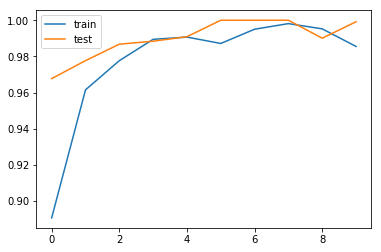

In [24]:
from matplotlib import pyplot
# evaluate the modelx
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
# evaluate the model
scores = model1.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model
scores = model1.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1208/1208 [==============================] - 0s 23us/step

acc: 99.92%
4830/4830 [==============================] - 0s 37us/step

acc: 99.57%


These scores do not seem to be correct. I am going to remake my neural network from scratch as I'm not too confident with what was done above. I will keep it in the notebook, however, as documentation for the process

In [30]:
X = df_NCAA[['away_defensive_rating', 'away_field_goals' ,'away_free_throws', 'away_offensive_rating', 'away_points', 'away_three_point_field_goals', 'away_wins', 'home_defensive_rating', 'home_field_goals', 'home_free_throws', 'home_offensive_rating', 'home_points', 'home_three_point_field_goals', 'home_wins']]
Y = df_NCAA[['winner']]

#create X_scale to normalize values. This will help reduce overfitting in the neural network
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

#train test split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

#second train test split to create validation sets and test sets
#im doing this due to what appeared to be overfitting in the previous models
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#get shape of different data splits
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

#testing a new number of neurons for a second neural network. This time I am also including a second hidden layer to compare the results
newModel = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#this time I will try the sgd optimizer function instead of the Adam one used in the previous neural network
#‘sgd’ refers to stochastic gradient descent
#The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
newModel.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#
hist = newModel.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

(4226, 14) (906, 14) (906, 14) (4226, 1) (906, 1) (906, 1)
Train on 4226 samples, validate on 906 samples
Epoch 1/100
4226/4226 [==============================] - 1s 213us/step - loss: 0.6483 - acc: 0.6668 - val_loss: 0.6527 - val_acc: 0.6369
Epoch 2/100
4226/4226 [==============================] - 0s 59us/step - loss: 0.6198 - acc: 0.6668 - val_loss: 0.6310 - val_acc: 0.6369
Epoch 3/100
4226/4226 [==============================] - 0s 56us/step - loss: 0.5970 - acc: 0.6668 - val_loss: 0.6081 - val_acc: 0.6369
Epoch 4/100
4226/4226 [==============================] - 0s 60us/step - loss: 0.5718 - acc: 0.6668 - val_loss: 0.5802 - val_acc: 0.6369
Epoch 5/100
4226/4226 [==============================] - 0s 63us/step - loss: 0.5411 - acc: 0.6675 - val_loss: 0.5467 - val_acc: 0.6744
Epoch 6/100
4226/4226 [==============================] - 0s 90us/step - loss: 0.5059 - acc: 0.7030 - val_loss: 0.5081 - val_acc: 0.7483
Epoch 7/100
4226/4226 [==============================] - 0s 58us/step - loss:

4226/4226 [==============================] - 0s 70us/step - loss: 0.0333 - acc: 0.9962 - val_loss: 0.0369 - val_acc: 0.9945
Epoch 61/100
4226/4226 [==============================] - 0s 55us/step - loss: 0.0325 - acc: 0.9969 - val_loss: 0.0350 - val_acc: 0.9967
Epoch 62/100
4226/4226 [==============================] - 0s 55us/step - loss: 0.0320 - acc: 0.9962 - val_loss: 0.0347 - val_acc: 0.9967
Epoch 63/100
4226/4226 [==============================] - 0s 54us/step - loss: 0.0316 - acc: 0.9957 - val_loss: 0.0526 - val_acc: 0.9779
Epoch 64/100
4226/4226 [==============================] - 0s 60us/step - loss: 0.0310 - acc: 0.9960 - val_loss: 0.0331 - val_acc: 0.9967
Epoch 65/100
4226/4226 [==============================] - 0s 52us/step - loss: 0.0304 - acc: 0.9969 - val_loss: 0.0448 - val_acc: 0.9834
Epoch 66/100
4226/4226 [==============================] - 0s 57us/step - loss: 0.0298 - acc: 0.9969 - val_loss: 0.0346 - val_acc: 0.9967
Epoch 67/100
4226/4226 [==============================

In [40]:
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,

In [41]:
newModel.evaluate(X_test, Y_test)[1]

906/906 [==============================] - 0s 33us/step


0.9977924944812362

It seems that the second neural net that I have run also predicts with impecciable accuracy. The model has been trained and tested, but something is wrong as there is no way it could have predicted every game perfectly. I am going to test it on the NCAA bracket and see what results it gets, as I'm suspicious in its current form it will suffer from sever overfitting